In [5]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

from gamtools import segregation, cosegregation
from gam_follow_up import config, utils

In [2]:
seg_1NP_40kb = segregation.open_segregation(
    config.in_data_raw('1np-gam-data/gamtools_output/segregation_at_40kb.passed_qc.table'))

In [3]:
seg_3NP_40kb = segregation.open_segregation(
    config.in_data_raw('multiplex-gam-data/gamtools_output/segregation_at_40kb.passed_qc.table'))

In [4]:
seg_all_40kb = segregation.open_segregation(
    config.in_data_processed('segregation-tables/combined_segregation_at_40kb.table'))

In [17]:
def get_merged(original_segmentation, merge=2):
    column_indexes = list(range(len(original_segmentation.columns)))

    # Shuffle column indexes in place
    np.random.shuffle(column_indexes)

    # Group them in threes
    index_sets = list(utils.grouper(column_indexes, merge))

    # Merge random columns of the segmentation in groups of three
    return pd.concat(
        [original_segmentation.iloc[:,indexes].any(axis=1).astype(int) for indexes in index_sets],
        axis=1)

In [7]:
hoxa_loc = 'chr6:49000000-54200000'

In [8]:
np.random.seed(64448)

0.16239921748638153 0.7352987122535707


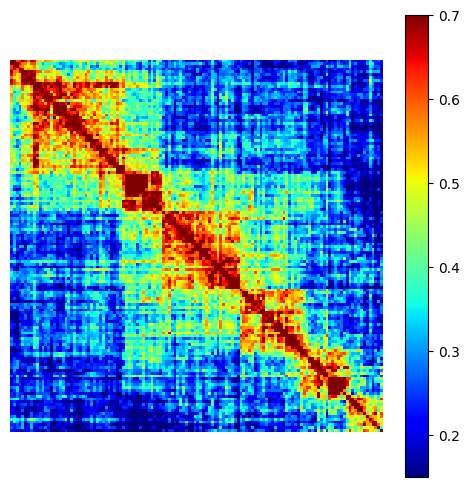

In [22]:
plt.figure(figsize=(6,6), facecolor='white')

hoxa_matrix = cosegregation.get_dprime(seg_1NP_40kb, hoxa_loc)

bottom = np.percentile(hoxa_matrix, 5)
top = np.percentile(hoxa_matrix, 98)

print(bottom, top)

im = plt.imshow(hoxa_matrix,
    interpolation='none', vmin=0.15, vmax=0.7, cmap='jet')

plt.axis('off')

plt.colorbar(im)

0.1428571492433548 0.7451455593109131


(-0.5, 129.5, 129.5, -0.5)

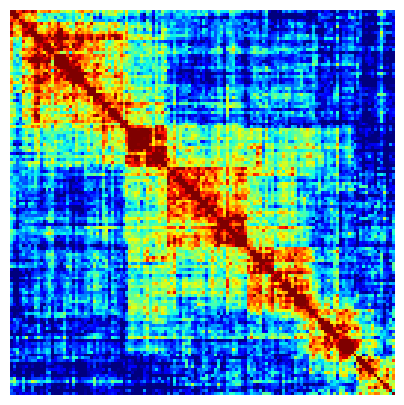

In [23]:
plt.figure(figsize=(5,5), facecolor='white')

hoxa_matrix = cosegregation.get_dprime(get_merged(seg_1NP_40kb, 2), hoxa_loc)

bottom = np.percentile(hoxa_matrix, 5)
top = np.percentile(hoxa_matrix, 98)

print(bottom, top)

plt.imshow(hoxa_matrix,
    interpolation='none', vmin=0.15, vmax=0.7, cmap='jet')

plt.axis('off')

0.13718722760677338 0.7499999415874481


(-0.5, 129.5, 129.5, -0.5)

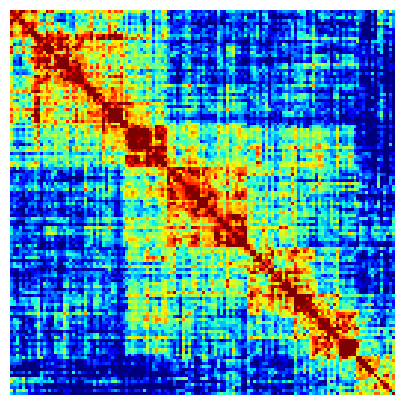

In [24]:
plt.figure(figsize=(5,5), facecolor='white')

hoxa_matrix = cosegregation.get_dprime(get_merged(seg_1NP_40kb, 3), hoxa_loc)

bottom = np.percentile(hoxa_matrix, 5)
top = np.percentile(hoxa_matrix, 98)

print(bottom, top)

plt.imshow(hoxa_matrix,
    interpolation='none', vmin=0.15, vmax=0.7, cmap='jet')

plt.axis('off')

0.13603733479976654 0.6635366058349614


(-0.5, 129.5, 129.5, -0.5)

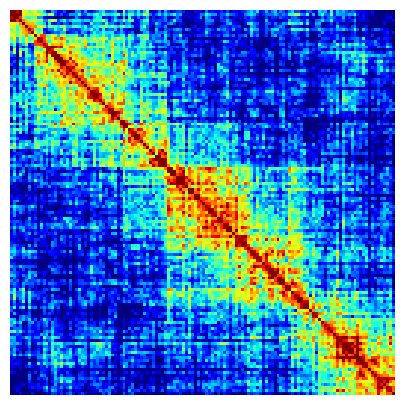

In [26]:
plt.figure(figsize=(5,5), facecolor='white')

hoxa_matrix = cosegregation.get_dprime(seg_3NP_40kb, hoxa_loc)

bottom = np.percentile(hoxa_matrix, 5)
top = np.percentile(hoxa_matrix, 98)

print(bottom, top)

plt.imshow(hoxa_matrix,
    interpolation='none', vmin=0.15, vmax=0.7, cmap='jet')

plt.axis('off')

0.2004673033952713 0.6767873489856724


(-0.5, 129.5, 129.5, -0.5)

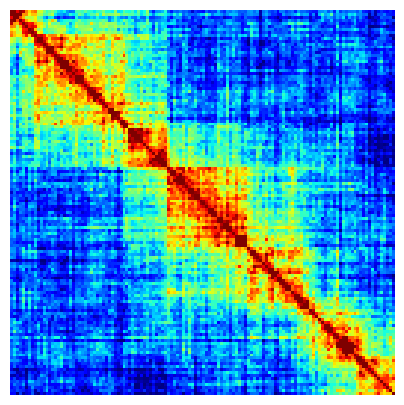

In [28]:
plt.figure(figsize=(5,5), facecolor='white')

hoxa_matrix = cosegregation.get_dprime(seg_all_40kb, hoxa_loc)

bottom = np.percentile(hoxa_matrix, 5)
top = np.percentile(hoxa_matrix, 98)

print(bottom, top)

plt.imshow(hoxa_matrix,
    interpolation='none', vmin=0.15, vmax=0.7, cmap='jet')

plt.axis('off')